# VERITUS - Fake News Detector

# Image Analysis

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
#%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


In [16]:
from PIL import Image
import os
from pylab import *
import re
from PIL import Image, ImageChops, ImageEnhance

In [17]:
def get_imlist(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.png')]

In [25]:
def ela_image(path, quality):
    filename = path
    resaved_filename = filename.split('.')[0] + '.resaved.jpg'
    ELA_filename = filename.split('.')[0] + '.ela.png'
    
    im = Image.open(filename).convert('RGB')
    im.save(resaved_filename, 'JPEG', quality=quality)
    resaved_im = Image.open(resaved_filename)
    
    ela_im = ImageChops.difference(im, resaved_im)
    
    extrema = ela_im.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale  = 700.0 / max_diff
    
    ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
    
    return ela_im

# Real Image

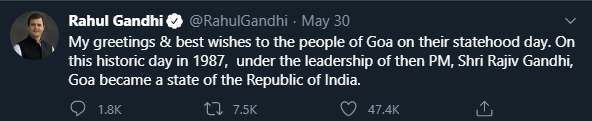

In [26]:
Image.open('C:\\Users\\User\\Desktop\\Screenshot.png')

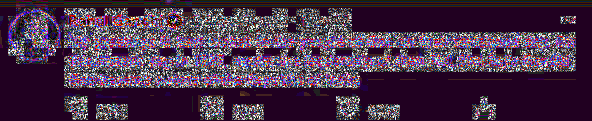

In [27]:
ela_image('C:\\Users\\User\\Desktop\\Screenshot.png', 90)

# Fake Image

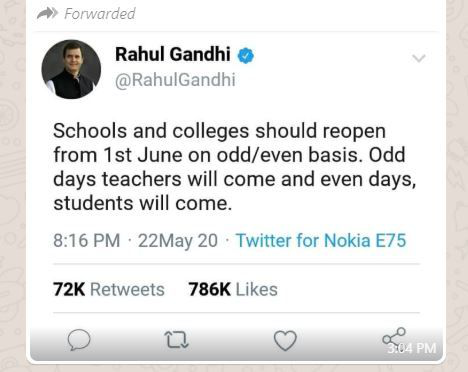

In [28]:
Image.open('C:\\Users\\User\\Desktop\\fake.jpg')

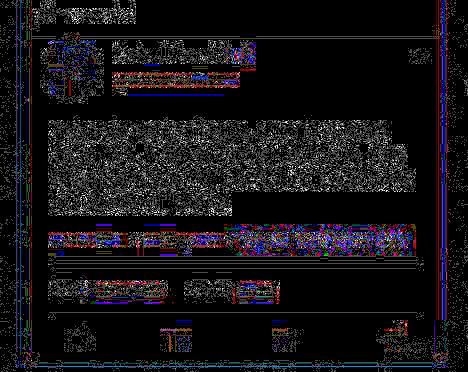

In [29]:
ela_image('C:\\Users\\User\\Desktop\\fake.jpg', 90)

# Supports .png format too...

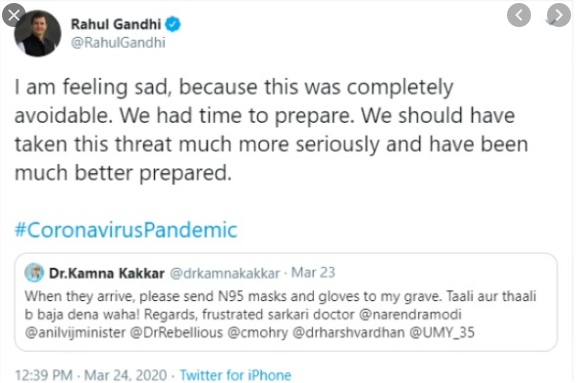

In [23]:
Image.open('C:\\Users\\User\\Desktop\\pjimage.png')

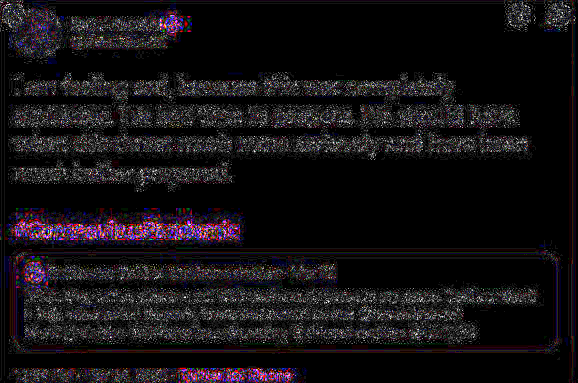

In [24]:
convert_to_ela_image('C:\\Users\\User\\Desktop\\pjimage.png', 90)

# Text Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('C:\\Users\\User\\Desktop\\Threat Analysis\\News Data.xlsx')

In [3]:
data.head()

,Unnamed: 0,title,text,label
0,1,WHO halts hydroxychloroquine trial for coronav...,The World Health Organization has said it will...,True
1,2,Blood clot the main reason for Covid-19 death,An Internet article on Covid-19 claims that It...,False
2,3,"Reopening of Malls, Offices, Eateries, Worship",The Government of India through the Ministry o...,True
3,4,NASA satellite videos have shown that the coro...,The message credits hundreds and thousands of ...,False
4,5,Health experts say UK contact tracing not robu...,The NHS Test and Trace programme is not robust...,True


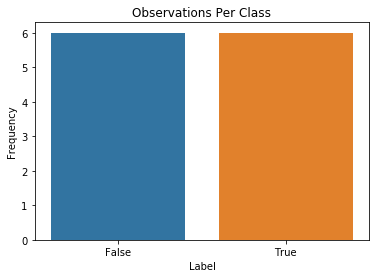

In [4]:
sns.countplot(data['label'])
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Observations Per Class')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test=train_test_split(data['text'],data['label'],test_size=0.3,random_state=5)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
tfid=TfidfVectorizer(stop_words='english',max_df=0.7)

In [9]:
transformed_Xtrain=tfid.fit_transform(X_train)
transformed_Xtest=tfid.transform(X_test)

In [10]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [11]:
passive=PassiveAggressiveClassifier(max_iter=100)

In [12]:
passive.fit(transformed_Xtrain,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              early_stopping=False, fit_intercept=True, loss='hinge',
              max_iter=100, n_iter=None, n_iter_no_change=5, n_jobs=None,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy_score(y_test,passive.predict(transformed_Xtest))

1.0